In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt

path_m = '/content/ann_criterion.py'

sys.path.insert(0,path_m)

from ann_criterion import optimality_criterion


In [ ]:
"""
  Population generation

  Population = an array of 60 dimension vectors

"""

def generate_population(population_size):

  population = []
  dimensions = 60

  for i in range(population_size):
    chromosome = np.random.rand(dimensions)
    population.append(chromosome)

  return population


In [ ]:
"""
  Evaluation

  Evaluation = iterates population and maps scores to each chromosome

"""

def evaluate_population(population):

  population_size = len(population)
  scores = [0] * population_size

  for i in range(population_size):
    scores[i] = optimality_criterion(population[i])

  scores_sorted = sorted(zip(scores, population), key = lambda x: x[0])

  scores, ranked_parents = zip(*scores_sorted)

  return scores, ranked_parents


In [ ]:
"""
  Selection

"""

def roulette_selection(ranked_parents, costs):
  length = len(costs)

  weights = [(length - i)*costs[i] for i in range(length)]
  weights_sum = sum(weights)
  normalized_weights = [1-(weights[i]/weights_sum) for i in range(len(weights))]

  cumulative_probability = [sum(normalized_weights[:i+1]) for i in range(len(normalized_weights))]

  pairs = []

  for _ in range(len(ranked_parents)//2):
    pair = []
    for i, cp in enumerate(cumulative_probability):
      rand = np.random.rand()
      if rand <= cp:
        pair.append(ranked_parents[i])

      if len(pair) == 2:
        pairs.append(pair)
        break

  return pairs


In [ ]:
"""
  Crossover

"""

def crossover(pairs, crossover_rate):

  children = []
  length = len(pairs[0][0])

  for chromo1, chromo2 in pairs:
    i = int(crossover_rate*length)
    child1 = np.concatenate((chromo1[:i], chromo2[i:]))
    child2 = np.concatenate((chromo2[:i], chromo1[i:]))
    children.append(child1)
    children.append(child2)

  return children


In [ ]:
"""
  Mutation


"""

def swap_mutation(children, mutation_rate):
  for i in range(len(children)):
    if np.random.rand() <= mutation_rate:
      j = np.random.randint(60)
      tmp = children[i][j]
      random_index =np.random.randint(60)
      children[i][j] = children[i][random_index]
      children[i][random_index] = tmp
  return children

def inversion_mutation(children, mutation_rate):
  for i in range(len(children)):
    if np.random.rand() <= mutation_rate:
      j = np.random.randint(60)
      flipped = children[i][j::-1]
      child = children[i][:j]
      child += flipped
      children[i] = child
  return children

def scramble_mutation(children, mutation_rate):
  for i in range(len(children)):
    if np.random.rand() <= mutation_rate:
      j = np.random.randint(60)
      k = np.random.randint(60)
      if k > j:
        k, j = j, k
      flipped = children[i][k:j:-1]
      segment1 = children[i][:k]
      segment2 = children[i][j:]
      child += segment1 + flipped + segment2
      children[i] = child
  return children


In [ ]:
"""
  Elitism

"""

def elitism(ranked_parents, ranked_children, elitism_rate):

  population_size = len(ranked_parents)
  elitism_size = int(population_size*elitism_rate)

  parents = ranked_parents[:elitism_size]
  children = ranked_children[:(population_size - elitism_size)]

  return parents + children


In [ ]:
"""
  Visualization

"""

def visualize(num_generations, all_best, all_average):
  colors = ['red', 'green', 'blue', 'yellow', 'orange']

  #show average
  c = 0
  for average_list in all_average:
      x_axis = list(range(num_generations[c]))
      y_axis = average_list
      plt.plot(x_axis, y_axis, linewidth=3, color=colors[c], label=str(c + 1))
      plt.title('Average loss', fontsize=20)
      plt.xlabel('Generation', fontsize=10)
      plt.ylabel('Loss function')
      c += 1

  plt.legend(loc='upper right')
  plt.show()

  #show best
  c = 0
  for best_list in all_best:
      x_axis = list(range(num_generations[c]))
      y_axis = best_list
      plt.plot(x_axis, y_axis, color=colors[c], label=str(c + 1))
      plt.title('Best loss', fontsize=20)
      plt.xlabel('Generation')
      plt.ylabel('Loss function')
      c += 1

  plt.legend(loc='upper right')
  plt.show()


In [ ]:
"""
  Main Loop

"""

def genetic_algorithm(params, all_best, all_average):

  population = generate_population(params["population_size"])
  global_best = 9999999
  global_best_iterations = 0

  best_list = []
  average_list = []

  for i in range(params["max_iterations"]):
    costs, ranked_parents = evaluate_population(population)
    best, average = costs[0], sum(costs)/params["population_size"]

    pairs = roulette_selection(ranked_parents, costs)

    children = crossover(pairs, params["crossover_rate"])
    children = swap_mutation(children, params["mutation_rate"])
    costs, ranked_children = evaluate_population(children)

    population = elitism(ranked_parents, ranked_children, params["elitism_rate"])

    best_list.append(best)
    average_list.append(average)

    print("Iteration", i, "/", params['max_iterations'], "Best value:", best)

    if best < global_best:
      global_best = best
    elif best == global_best:
      global_best_iterations += 1

    if i != 0 and i % 50 == 0:
      params["mutation_rate"] -= 0.05

    if best <  params["threshold"]:

      all_best.append(best_list)
      all_average.append(average_list)

      return global_best

    elif global_best_iterations > 10:
      params["mutation_rate"] += 0.2

    elif i == params["max_iterations"] - 1:

      all_best.append(best_list)
      all_average.append(average_list)

      return global_best

    if global_best_iterations > 20:
      all_best.append(best_list)
      all_average.append(average_list)

      return global_best

In [ ]:
"""
  Configuration

"""

params = {}

elitism_rate = 0.1
mutation_rate = 0.4
crossover_rate = 0.6

max_iterations = 200
population_size = 200
runs = 5
threshold = 0.0005


params["elitism_rate"] = 0.1
params["mutation_rate"] = 0.4
params["crossover_rate"] = 0.6

params["max_iterations"] = 200
params["population_size"] = 200
params["threshold"] = 0.05

runs = 5

Iteration 0 / 200 Best value: 0.49475738095290567
Iteration 1 / 200 Best value: 0.47346011124347953
Iteration 2 / 200 Best value: 0.4494245664254511
Iteration 3 / 200 Best value: 0.4231609727168904
Iteration 4 / 200 Best value: 0.4078057760819626
Iteration 5 / 200 Best value: 0.380210078025123
Iteration 6 / 200 Best value: 0.3598621365036316
Iteration 7 / 200 Best value: 0.34465256367219194
Iteration 8 / 200 Best value: 0.34213506072425026
Iteration 9 / 200 Best value: 0.3396211800614399
Iteration 10 / 200 Best value: 0.3110440213817496
Iteration 11 / 200 Best value: 0.30977723728441453
Iteration 12 / 200 Best value: 0.30666027997744705
Iteration 13 / 200 Best value: 0.30577373997206936
Iteration 14 / 200 Best value: 0.2995685953102929
Iteration 15 / 200 Best value: 0.2848662604266701
Iteration 16 / 200 Best value: 0.2830208813544985
Iteration 17 / 200 Best value: 0.2811716268807252
Iteration 18 / 200 Best value: 0.26632190593818716
Iteration 19 / 200 Best value: 0.2639755440594216
Ite

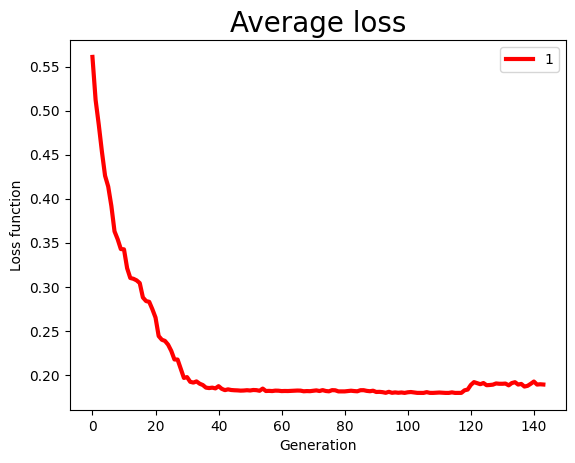

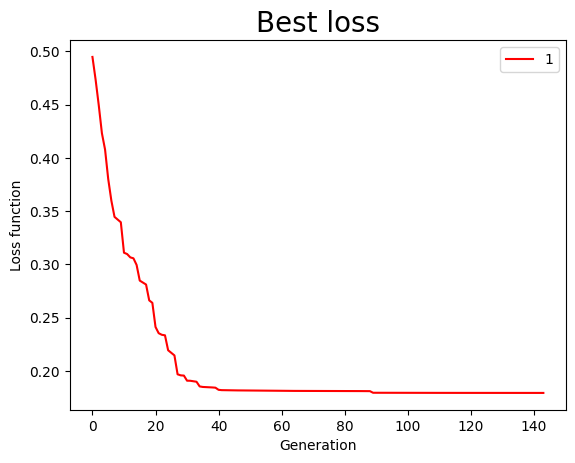

'\n\nelitism_rate = 0.1\nmutation_rate = 0.4\ncrossover_rate = 0.6\n\nmax_iterations = 200\npopulation_size = 200\nruns = 5\nthreshold = 0.0005\n\nRun 0\n\n0.30510885164144896\n\nRun 1\n\n0.25234004705510604\n\nRun 2\n\n0.34575333474100134\n\nRun 3\n\n0.32804185794853874\n\nRun 4\n\n0.2927436392076452\n\nRun 5\n\n0.1676921204673874\n\nRun 6\n\n0.19920366899859548\n\nRun 7\n\n0.20741274982452718\n\n'

In [ ]:
"""
  Running

"""


all_best = []
all_average = []

# for run in range(runs):
  # print("Run", run, "with", params["population_size"], "chromosomes")
best = genetic_algorithm(params, all_best, all_average)
# print("Best value for run", run, "is", best)

num_generations = [len(all_best[i]) for i in range(len(all_best))]

visualize(num_generations, all_best, all_average)


"""

elitism_rate = 0.1
mutation_rate = 0.4
crossover_rate = 0.6

max_iterations = 200
population_size = 200
runs = 5
threshold = 0.0005

Run 0

0.30510885164144896

Run 1

0.25234004705510604

Run 2

0.34575333474100134

Run 3

0.32804185794853874

Run 4

0.2927436392076452

Run 5

0.1676921204673874

Run 6

0.19920366899859548

Run 7

0.20741274982452718

Run 8

0.17945812083300172

"""